In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [ ]:


GENES = {
    1: ["DS211", 3, "khuramm", "Ai"],
    2: ["AI201", 3, "raja", "Ai"],
    3: ["CE222", 3, "taj", "Ai"],
    4: ["A211", 2, "farhan", "Ai"],
    5: ["CS225", 3, "ahsan", "CS"],
    6: ["CS232", 3, "ahsan", "CS"],
    7: ["ES202", 3, "omar", "CS"],
    8: ["CE222", 3, "ghulam", "CS"],
    9: ["CS31", 3, "hanif", "CE"],
    10: ["CS211", 3, "badr", "CE"],
    11: ["CS232", 3, "mohsin", "CE"],
    12: ["MT203", 3, "siraj", "CE"],
    13: ["DS211", 3, "beenish", "DS"],
    14: ["CE222", 3, "junaid", "DS"],
    15: ["cs251", 3, "khurram", "DS"],
    16: ["DS212", 2, "taj", "DS"],
    17: ["CS232", 3, "ghulam", "CS"],
    18: ["AI361", 3, "zahid", "CS"],
    19: ["AI319", 3, "Ahsan", "CS"],
    20: ["AIxx", 3, "ghulam", "CS"],
    21: ["CS325", 3, "junaid", "CE"],
    22: ["CS230", 3, "abbas", "CE"],
    23: ["CE324", 3, "ghulam", "CE"],
    24: ["CSxx+", 3, "zahid", "CE"],
    25: ["CExx+", 3, "Ahsan", "CE"],
    26: ["CS325", 3, "junaid", "Ai"],
    27: ["CS342", 3, "Beenish", "Ai"],
    28: ["CS325", 3, "Zulfiqar", "Ai"],
    29: ["CSxxx", 3, "huma", "Ai"],
    30: ["CS417", 3, "farhan", "Ai"],
    31: ["MT102", 3, "Nasir", "CE"],
    32: ["HM102", 3, "Atta", "CE"],
    33: ["ES111", 3, "Fahad", "CE"],
    34: ["MM102", 3, "Shanza", "CE"],
    35: ["CS112", 3, "Salman", "CE"],
    36: ["Mt102", 3, "Minhaj", "DS"],
    37: ["CS112", 3, "zahid", "DS"],
    38: ["MM101", 3, "Salman", "DS"],
    39: ["HM102", 3, "Jadoon", "DS"],
    40: ["ES111", 3, "Fahad", "DS"],
    41: ["Mt102", 3, "Minhaj", "CS"],
    42: ["CS112", 3, "Qasim", "CS"],
    43: ["MM101", 3, "Shanza", "CS"],
    44: ["HM102", 3, "Hira", "CS"],
    45: ["ES111", 3, "Ahmed", "CS"]
}



In [ ]:

# Constants
POPULATION_SIZE = 100
CROSSOVER_RATE = 0.8
MUTATION_RATE = 0.1
MAX_GENERATIONS = 500
DAYS_PER_WEEK = 5
WEEK_DAYS = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
SLOTS_PER_DAY = 7
SECTIONS = ["FES", "FCSE", "FME"]
lecture_halls = ["LH1", "LH2", "LH3", "LH4", "LH5", "LH6"]







In [ ]:
class Schedule:
    def __init__(self, section):
        self.section = section
        self.chromosomes = []
        self.course_repetitions = {k: 0 for k in GENES}
        self.courses_in_slot = [set() for _ in range(SLOTS_PER_DAY * len(WEEK_DAYS))]
        for _ in range(SLOTS_PER_DAY * len(WEEK_DAYS)):
            available_courses = [k for k, v in GENES.items() if v[3] == section and v[0] not in self.courses_in_slot[_] and self.course_repetitions[k] < v[1]]
            if available_courses:
                chromosome = random.choice(available_courses)
                self.chromosomes.append(chromosome)
                self.course_repetitions[chromosome] += 1
                course = GENES[chromosome]
                self.courses_in_slot[_].add(course[0])
            else:
                self.chromosomes.append(None)

    def fitness(self):
        score = 0
        for i in range(len(WEEK_DAYS)):
            instructors = set()
            for j in range(SLOTS_PER_DAY):
                index = i * SLOTS_PER_DAY + j
                if self.chromosomes[index] is not None:
                    course = GENES[self.chromosomes[index]]
                    instructors.add(course[2])
                score += len(instructors)
        return score


    def crossover(self, other):
        child1 = Schedule(self.section)
        child2 = Schedule(self.section)
        for i in range(DAYS_PER_WEEK):
            if random.random() < CROSSOVER_RATE:
                child1.courses_in_slot[i] = set(self.courses_in_slot[i])
                child2.courses_in_slot[i] = set(other.courses_in_slot[i])
            else:
                child1_course = self.chromosomes[i * SLOTS_PER_DAY]
                child2_course = other.chromosomes[i * SLOTS_PER_DAY]
                if child1_course is not None:
                    child1.chromosomes.append(child1_course)
                    child1.courses_in_slot[i] = set(child1.courses_in_slot[i]) | {GENES[child1_course][0]}
                if child1_course is not None and child1_course not in child2.courses_in_slot[i]:
                    child2.chromosomes.append(child1_course)
                    child2.courses_in_slot[i] = set(child2.courses_in_slot[i]) | {GENES[child1_course][0]}
                if child2_course is not None:
                    child2.chromosomes.append(child2_course)
                    child2.courses_in_slot[i] = set(child2.courses_in_slot[i]) | {GENES[child2_course][0]}
                if child2_course is not None and child2_course not in child1.courses_in_slot[i]:
                    child1.chromosomes.append(child2_course)
                    child1.courses_in_slot[i] = set(child1.courses_in_slot[i]) | {GENES[child2_course][0]}
        return child1, child2

    def mutate(self):
        if random.random() < MUTATION_RATE:
            index = random.randint(0, len(self.chromosomes) - 1)
            current_course = self.chromosomes[index]
            current_course_name = GENES[current_course][0] if current_course is not None else None
            available_courses = []
            for i in range(len(self.courses_in_slot)):
                available_courses.extend([k for k, v in GENES.items() if v[3] == self.section and k != current_course and v[0] not in self.courses_in_slot[i]])
            if available_courses:
                new_course = random.choice(available_courses)
                self.chromosomes[index] = new_course
                new_course_name = GENES[new_course][0]
                i = index // SLOTS_PER_DAY
                self.courses_in_slot[i] = {new_course_name}
            else:
                i = index // SLOTS_PER_DAY
                self.courses_in_slot[i] = {current_course_name} if current_course_name is not None else set()

           


In [ ]:
def genetic_algorithm(section):
    population = [Schedule(section) for _ in range(POPULATION_SIZE)]

    for generation in range(MAX_GENERATIONS):
        population = sorted(population, key=lambda x: x.fitness(), reverse=True)
        new_population = population[:POPULATION_SIZE // 2]

        while len(new_population) < POPULATION_SIZE:
            parent1, parent2 = random.sample(population[:POPULATION_SIZE // 2], 2)
            child1, child2 = parent1.crossover(parent2)
            child1.mutate()
            child2.mutate()
            new_population.extend([child1, child2])

        population = new_population

        best_schedule = population[0]
        best_fitness = best_schedule.fitness()
        print(f"Generation {generation}, Fitness: {best_fitness}")

        if best_fitness == len(WEEK_DAYS) * SLOTS_PER_DAY:
            break

    return best_schedule

In [ ]:
def print_timetable(schedule):
    print(f"Section: {schedule.section}")
    for i in range(DAYS_PER_WEEK):
        print(f"Day {i + 1}:")
        for j in range(SLOTS_PER_DAY):
            index = i * SLOTS_PER_DAY + j
            course_key = schedule.chromosomes[index]
            if course_key is not None:
                course = GENES[course_key]
                print(f"\tSlot {j + 1}: {course[0]}, {course[1]} credit hours, Instructor: {course[2]}, Section: {course[3]}")
            else:
                print(f"\tSlot {j + 1}: None")


Generation 0, Fitness: 99
Generation 1, Fitness: 100
Generation 2, Fitness: 104
Generation 3, Fitness: 104
Generation 4, Fitness: 104
Generation 5, Fitness: 104
Generation 6, Fitness: 104
Generation 7, Fitness: 104
Generation 8, Fitness: 104
Generation 9, Fitness: 104
Generation 10, Fitness: 104
Generation 11, Fitness: 104
Generation 12, Fitness: 104
Generation 13, Fitness: 104
Generation 14, Fitness: 104
Generation 15, Fitness: 104
Generation 16, Fitness: 104
Generation 17, Fitness: 104
Generation 18, Fitness: 104
Generation 19, Fitness: 104
Generation 20, Fitness: 104
Generation 21, Fitness: 104
Generation 22, Fitness: 104
Generation 23, Fitness: 104
Generation 24, Fitness: 104
Generation 25, Fitness: 104
Generation 26, Fitness: 104
Generation 27, Fitness: 104
Generation 28, Fitness: 104
Generation 29, Fitness: 104
Generation 30, Fitness: 104
Generation 31, Fitness: 104
Generation 32, Fitness: 104
Generation 33, Fitness: 104
Generation 34, Fitness: 104
Generation 35, Fitness: 104
Gen

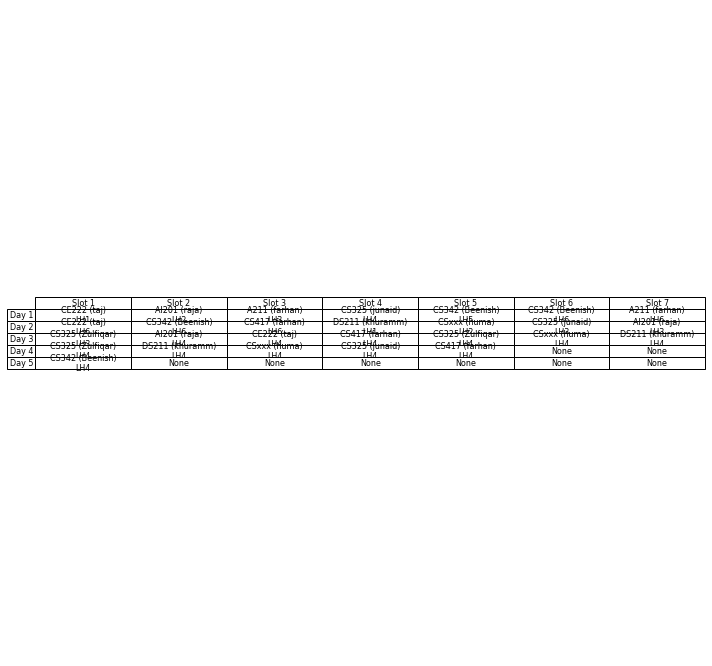

Generation 0, Fitness: 107
Generation 1, Fitness: 107
Generation 2, Fitness: 108
Generation 3, Fitness: 108
Generation 4, Fitness: 108
Generation 5, Fitness: 108
Generation 6, Fitness: 108
Generation 7, Fitness: 108
Generation 8, Fitness: 108
Generation 9, Fitness: 108
Generation 10, Fitness: 108
Generation 11, Fitness: 108
Generation 12, Fitness: 108
Generation 13, Fitness: 108
Generation 14, Fitness: 108
Generation 15, Fitness: 108
Generation 16, Fitness: 108
Generation 17, Fitness: 108
Generation 18, Fitness: 108
Generation 19, Fitness: 108
Generation 20, Fitness: 108
Generation 21, Fitness: 108
Generation 22, Fitness: 108
Generation 23, Fitness: 108
Generation 24, Fitness: 108
Generation 25, Fitness: 108
Generation 26, Fitness: 108
Generation 27, Fitness: 108
Generation 28, Fitness: 108
Generation 29, Fitness: 108
Generation 30, Fitness: 108
Generation 31, Fitness: 108
Generation 32, Fitness: 108
Generation 33, Fitness: 108
Generation 34, Fitness: 108
Generation 35, Fitness: 108
Ge

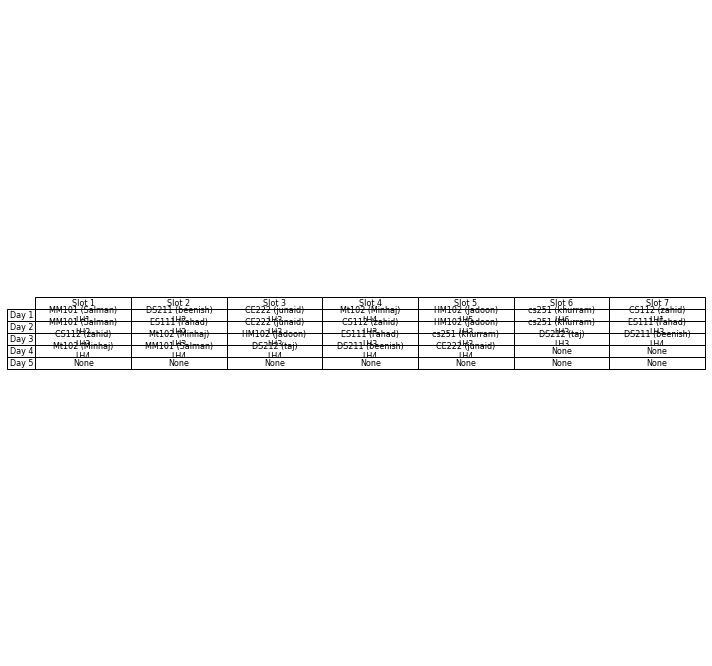

Generation 0, Fitness: 139
Generation 1, Fitness: 139
Generation 2, Fitness: 139
Generation 3, Fitness: 139
Generation 4, Fitness: 139
Generation 5, Fitness: 139
Generation 6, Fitness: 139
Generation 7, Fitness: 139
Generation 8, Fitness: 139
Generation 9, Fitness: 139
Generation 10, Fitness: 139
Generation 11, Fitness: 139
Generation 12, Fitness: 139
Generation 13, Fitness: 139
Generation 14, Fitness: 139
Generation 15, Fitness: 139
Generation 16, Fitness: 139
Generation 17, Fitness: 139
Generation 18, Fitness: 139
Generation 19, Fitness: 139
Generation 20, Fitness: 139
Generation 21, Fitness: 139
Generation 22, Fitness: 139
Generation 23, Fitness: 139
Generation 24, Fitness: 139
Generation 25, Fitness: 139
Generation 26, Fitness: 139
Generation 27, Fitness: 139
Generation 28, Fitness: 139
Generation 29, Fitness: 139
Generation 30, Fitness: 139
Generation 31, Fitness: 139
Generation 32, Fitness: 139
Generation 33, Fitness: 139
Generation 34, Fitness: 139
Generation 35, Fitness: 139
Ge

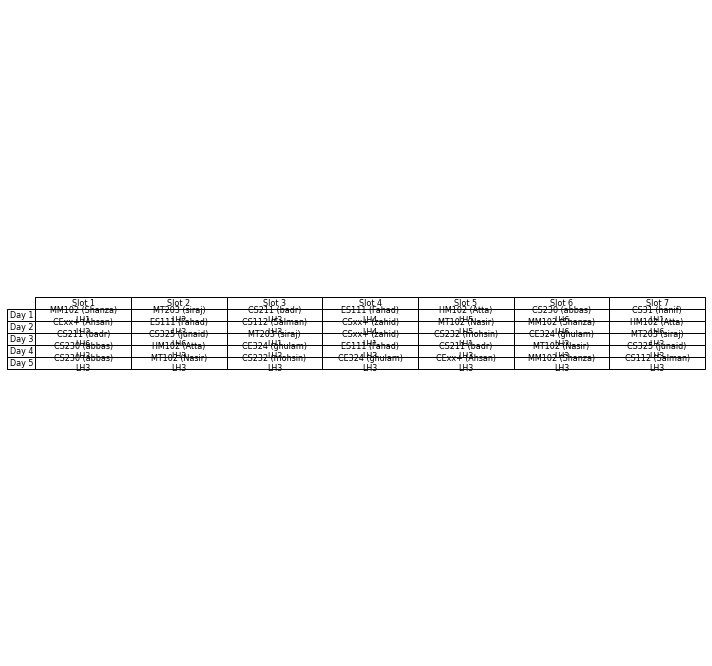

Generation 0, Fitness: 129
Generation 1, Fitness: 129
Generation 2, Fitness: 129
Generation 3, Fitness: 129
Generation 4, Fitness: 129
Generation 5, Fitness: 129
Generation 6, Fitness: 129
Generation 7, Fitness: 129
Generation 8, Fitness: 129
Generation 9, Fitness: 129
Generation 10, Fitness: 129
Generation 11, Fitness: 129
Generation 12, Fitness: 129
Generation 13, Fitness: 129
Generation 14, Fitness: 129
Generation 15, Fitness: 129
Generation 16, Fitness: 129
Generation 17, Fitness: 129
Generation 18, Fitness: 129
Generation 19, Fitness: 129
Generation 20, Fitness: 129
Generation 21, Fitness: 129
Generation 22, Fitness: 129
Generation 23, Fitness: 129
Generation 24, Fitness: 133
Generation 25, Fitness: 133
Generation 26, Fitness: 133
Generation 27, Fitness: 133
Generation 28, Fitness: 133
Generation 29, Fitness: 133
Generation 30, Fitness: 133
Generation 31, Fitness: 133
Generation 32, Fitness: 133
Generation 33, Fitness: 133
Generation 34, Fitness: 133
Generation 35, Fitness: 133
Ge

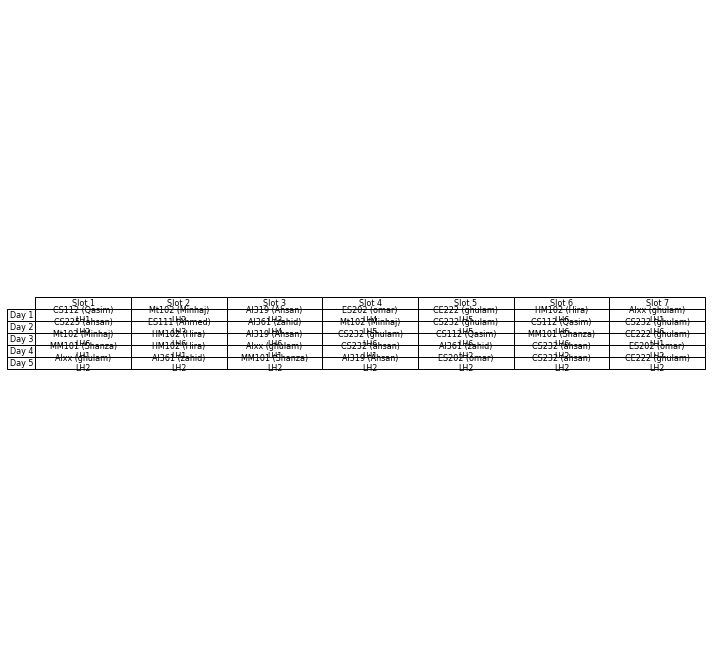

In [ ]:
def visualize_timetable(schedule):
    data = np.empty((DAYS_PER_WEEK, SLOTS_PER_DAY), dtype=object)
    row_labels = [f"Day {i+1}" for i in range(DAYS_PER_WEEK)]
    col_labels = [f"Slot {i+1}" for i in range(SLOTS_PER_DAY)]
    
    
    lecture_hall_allocation = {}
    for i in range(DAYS_PER_WEEK):
        for j in range(SLOTS_PER_DAY):
            index = i * SLOTS_PER_DAY + j
            course_key = schedule.chromosomes[index]
            if course_key is not None:
                course = GENES[course_key]
                lecture_hall = lecture_halls[(len(lecture_hall_allocation) % len(lecture_halls))]
                lecture_hall_allocation[course_key] = lecture_hall
                data[i, j] = f"{course[0]} ({course[2]})\n{lecture_hall}"  # Course name, instructor name, and lecture hall
            else:
                data[i, j] = "None"

    fig, ax = plt.subplots(figsize=(12, 12))  # Increase the figure size
    ax.axis('off')
    table = ax.table(cellText=data, rowLabels=row_labels, colLabels=col_labels, loc='center', cellLoc='center')
    
    # Adjust the font size for table cells
    for key, cell in table.get_celld().items():
        cell.set_text_props(fontsize=8)
    
    plt.title(f"Section {schedule.section} Timetable", fontsize=16, pad=20)
    plt.show()




for section in SECTIONS:
    best_schedule = genetic_algorithm(section)
    print_timetable(best_schedule)
    visualize_timetable(best_schedule)
